ERROR: unknown command "insatall" - maybe you meant "install"


In [2]:
%%capture
!pip install roboflow
!pip install ultralytics
from roboflow import Roboflow
rf = Roboflow(api_key="GojoMvCjgAWvG6j6hFe8")
project = rf.workspace("project-x2uaa").project("employee-performance-monitoring")
version = project.version(4)
dataset = version.download("yolov8")


In [3]:
import cv2

def read_boxes_from_file(txt_file_path):
    """
    Reads bounding box information from a text file.
    Args:
        txt_file_path (str): Path to the text file containing bounding box information.
    Returns:
        list: A list of dictionaries containing class ID and normalized bounding box coordinates.
    """
    boxes = []
    with open(txt_file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            class_id = int(parts[0])  # First column is the class ID
            x_center, y_center, width, height = map(float, parts[1:])  # Rest are box coordinates
            boxes.append({
                'class_id': class_id,
                'x_center': x_center,
                'y_center': y_center,
                'width': width,
                'height': height
            })
    return boxes

def crop_boxes_from_image(image_path, boxes):
    """
    Crops bounding boxes from an image and saves them as separate files.
    Args:
        image_path (str): Path to the image file.
        boxes (list): List of bounding box information.
    """
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")

    height, width, _ = image.shape
    cropped_images=[]
    classes=[]
    for idx, box in enumerate(boxes):
        # Convert normalized coordinates to pixel values
        x_center = int(box['x_center'] * width)
        y_center = int(box['y_center'] * height)
        box_width = int(box['width'] * width)
        box_height = int(box['height'] * height)
        classe = box['class_id']
        # Calculate the top-left corner of the box
        x_min = max(0, x_center - box_width // 2)
        y_min = max(0, y_center - box_height // 2)
        x_max = min(width, x_center + box_width // 2)
        y_max = min(height, y_center + box_height // 2)

        # Crop the box from the image
        cropped_box = image[y_min:y_max, x_min:x_max]
        cropped_images.append(cropped_box)
        classes.append(classe)

    return cropped_images,classes





In [ ]:
import csv

# Define the CSV file name
output_csv = "keypoints_data_test.csv"

# Define the header with confidence included
header = ['image_name', 'classid',  # General information
          'Nose_x', 'Nose_y', 'Nose_conf',
          'Left Eye_x', 'Left Eye_y', 'Left Eye_conf',
          'Right Eye_x', 'Right Eye_y', 'Right Eye_conf',
          'Left Ear_x', 'Left Ear_y', 'Left Ear_conf',
          'Right Ear_x', 'Right Ear_y', 'Right Ear_conf',
          'Left Shoulder_x', 'Left Shoulder_y', 'Left Shoulder_conf',
          'Right Shoulder_x', 'Right Shoulder_y', 'Right Shoulder_conf',
          'Left Elbow_x', 'Left Elbow_y', 'Left Elbow_conf',
          'Right Elbow_x', 'Right Elbow_y', 'Right Elbow_conf',
          'Left Wrist_x', 'Left Wrist_y', 'Left Wrist_conf',
          'Right Wrist_x', 'Right Wrist_y', 'Right Wrist_conf',
          'Left Hip_x', 'Left Hip_y', 'Left Hip_conf',
          'Right Hip_x', 'Right Hip_y', 'Right Hip_conf',
          'Left Knee_x', 'Left Knee_y', 'Left Knee_conf',
          'Right Knee_x', 'Right Knee_y', 'Right Knee_conf',
          'Left Ankle_x', 'Left Ankle_y', 'Left Ankle_conf',
          'Right Ankle_x', 'Right Ankle_y', 'Right Ankle_conf']

# Create the CSV file and add the header
with open(output_csv, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(header)

print(f"CSV file '{output_csv}' created successfully with header: {header}")
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import cv2
import os
images_paths='/content/Employee-Performance-Monitoring-4/test/images/'
images_list=os.listdir(images_paths)
label_paths='/content/Employee-Performance-Monitoring-4/test/labels/'
model = YOLO("yolo11x-pose.pt")
for image_name in images_list:
    label_name=image_name.replace('.jpg','.txt')
    label_path=f'{label_paths}{label_name}'
    image_path=images_paths+image_name
    boxes=read_boxes_from_file(label_path)
    images,classes=crop_boxes_from_image(image_path,boxes)
    for image,clase in zip(images,classes):
      results=model(image, verbose=False)
      keypoints=results[0].keypoints.data.tolist()[0]
      if len(results[0].keypoints.data.tolist()[0])>0:
        keypoints_flat = [value for keypoint in keypoints for value in keypoint]
        row = [image_name, clase] + keypoints_flat
        with open(output_csv, 'a', newline='') as csvfile:
                  csvwriter = csv.writer(csvfile)
                  csvwriter.writerow(row)
import pandas as pd

# Path to your CSV file
csv_path = "/content/keypoints_data_test.csv"

data = pd.read_csv(csv_path)


ids=[0,1,2,3,4,5,6]
for i in range(0,len(data)):
  if data.iloc[i]['classid'] not in ids:
    print(i)
import pandas as pd


# Columns to retain in both files
common_columns = ['image_name', 'classid', 'Nose_x', 'Nose_y', 'Nose_conf']

# Define left keypoints columns
left_columns = [
    'Left Eye_x', 'Left Eye_y', 'Left Eye_conf',
    'Left Ear_x', 'Left Ear_y', 'Left Ear_conf',
    'Left Shoulder_x', 'Left Shoulder_y', 'Left Shoulder_conf',
    'Left Elbow_x', 'Left Elbow_y', 'Left Elbow_conf',
    'Left Wrist_x', 'Left Wrist_y', 'Left Wrist_conf',
    'Left Hip_x', 'Left Hip_y', 'Left Hip_conf',
    'Left Knee_x', 'Left Knee_y', 'Left Knee_conf',
    'Left Ankle_x', 'Left Ankle_y', 'Left Ankle_conf'
]

# Define right keypoints columns
right_columns = [
    'Right Eye_x', 'Right Eye_y', 'Right Eye_conf',
    'Right Ear_x', 'Right Ear_y', 'Right Ear_conf',
    'Right Shoulder_x', 'Right Shoulder_y', 'Right Shoulder_conf',
    'Right Elbow_x', 'Right Elbow_y', 'Right Elbow_conf',
    'Right Wrist_x', 'Right Wrist_y', 'Right Wrist_conf',
    'Right Hip_x', 'Right Hip_y', 'Right Hip_conf',
    'Right Knee_x', 'Right Knee_y', 'Right Knee_conf',
    'Right Ankle_x', 'Right Ankle_y', 'Right Ankle_conf'
]


left_data = data[common_columns + left_columns]

right_data = data[common_columns + right_columns]

left_csv_path = "left_keypoints.csv"
right_csv_path = "right_keypoints.csv"

left_data.to_csv(left_csv_path, index=False)
right_data.to_csv(right_csv_path, index=False)

print(f"Left keypoints saved to {left_csv_path}")
print(f"Right keypoints saved to {right_csv_path}")
columns_to_keep = [col for col in left_data.columns if not col.endswith("_conf")]

# Create a new DataFrame without the confidence columns
left_no_confidence = left_data[columns_to_keep]
left_no_confidence
columns_to_keep = [col for col in right_data.columns if not col.endswith("_conf")]

# Create a new DataFrame without the confidence columns
right_no_confidence = right_data[columns_to_keep]
right_no_confidence

import csv

# Define the output CSV file name
output_csv = "body_keypoints_test.csv"

# Define the column headers
headers = [
    "image_name", "classid", "Nose_x", "Nose_y",
    "Eye_x", "Eye_y", "Ear_x", "Ear_y",
    "Shoulder_x", "Shoulder_y", "Elbow_x", "Elbow_y",
    "Wrist_x", "Wrist_y", "Hip_x", "Hip_y", "Knee_x", "Knee_y",
    "Ankle_x", "Ankle_y"
]

# Create the new CSV file and write the header
with open(output_csv, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(headers)

print(f"New CSV file '{output_csv}' created with headers: {headers}")

import pandas as pd

output_csv = "body_keypoints_test.csv"  # File created in the previous step

# Load the input CSV file
input_data = left_no_confidence

# Define the mapping between old and new column names
column_mapping = {
    "image_name": "image_name",
    "classid": "classid",
    "Nose_x": "Nose_x",
    "Nose_y": "Nose_y",
    "Left Eye_x": "Eye_x",
    "Left Eye_y": "Eye_y",
    "Left Ear_x": "Ear_x",
    "Left Ear_y": "Ear_y",
    "Left Shoulder_x": "Shoulder_x",
    "Left Shoulder_y": "Shoulder_y",
    "Left Elbow_x": "Elbow_x",
    "Left Elbow_y": "Elbow_y",
    "Left Wrist_x": "Wrist_x",
    "Left Wrist_y": "Wrist_y",
    "Left Hip_x": "Hip_x",
    "Left Hip_y": "Hip_y",
    "Left Knee_x": "Knee_x",
    "Left Knee_y": "Knee_y",
    "Left Ankle_x": "Ankle_x",
    "Left Ankle_y": "Ankle_y"
}

# Rename columns in the input file according to the mapping
mapped_data = input_data.rename(columns=column_mapping)

# Filter only the columns that match the new file's structure
columns_to_keep = list(column_mapping.values())
filtered_data = mapped_data[columns_to_keep]

filtered_data.to_csv(output_csv, index=False)

print(f"Data copied and mapped to '{output_csv}' with new column names.")

import pandas as pd


output_csv = "body_keypoints_test.csv"  # File to which we'll append data

# Load the right-side keypoints CSV file
input_data = right_no_confidence

# Define the mapping between right keypoints and unified column names
column_mapping = {
    "image_name": "image_name",
    "classid": "classid",
    "Nose_x": "Nose_x",
    "Nose_y": "Nose_y",
    "Right Eye_x": "Eye_x",
    "Right Eye_y": "Eye_y",
    "Right Ear_x": "Ear_x",
    "Right Ear_y": "Ear_y",
    "Right Shoulder_x": "Shoulder_x",
    "Right Shoulder_y": "Shoulder_y",
    "Right Elbow_x": "Elbow_x",
    "Right Elbow_y": "Elbow_y",
    "Right Wrist_x": "Wrist_x",
    "Right Wrist_y": "Wrist_y",
    "Right Hip_x": "Hip_x",
    "Right Hip_y": "Hip_y",
    "Right Knee_x": "Knee_x",
    "Right Knee_y": "Knee_y",
    "Right Ankle_x": "Ankle_x",
    "Right Ankle_y": "Ankle_y"
}

# Rename columns in the right keypoints file according to the mapping
mapped_data = input_data.rename(columns=column_mapping)

# Filter only the columns that match the output file's structure
columns_to_keep = list(column_mapping.values())
filtered_data = mapped_data[columns_to_keep]

# Append the right-side data to the existing file
filtered_data.to_csv(output_csv, mode='a', header=False, index=False)

print(f"Right-side keypoints appended to '{output_csv}' with unified column names.")


CSV file 'keypoints_data_test.csv' created successfully with header: ['image_name', 'classid', 'Nose_x', 'Nose_y', 'Nose_conf', 'Left Eye_x', 'Left Eye_y', 'Left Eye_conf', 'Right Eye_x', 'Right Eye_y', 'Right Eye_conf', 'Left Ear_x', 'Left Ear_y', 'Left Ear_conf', 'Right Ear_x', 'Right Ear_y', 'Right Ear_conf', 'Left Shoulder_x', 'Left Shoulder_y', 'Left Shoulder_conf', 'Right Shoulder_x', 'Right Shoulder_y', 'Right Shoulder_conf', 'Left Elbow_x', 'Left Elbow_y', 'Left Elbow_conf', 'Right Elbow_x', 'Right Elbow_y', 'Right Elbow_conf', 'Left Wrist_x', 'Left Wrist_y', 'Left Wrist_conf', 'Right Wrist_x', 'Right Wrist_y', 'Right Wrist_conf', 'Left Hip_x', 'Left Hip_y', 'Left Hip_conf', 'Right Hip_x', 'Right Hip_y', 'Right Hip_conf', 'Left Knee_x', 'Left Knee_y', 'Left Knee_conf', 'Right Knee_x', 'Right Knee_y', 'Right Knee_conf', 'Left Ankle_x', 'Left Ankle_y', 'Left Ankle_conf', 'Right Ankle_x', 'Right Ankle_y', 'Right Ankle_conf']


100%|██████████| 113M/113M [00:00<00:00, 234MB/s] 


Left keypoints saved to left_keypoints.csv
Right keypoints saved to right_keypoints.csv
New CSV file 'body_keypoints_test.csv' created with headers: ['image_name', 'classid', 'Nose_x', 'Nose_y', 'Eye_x', 'Eye_y', 'Ear_x', 'Ear_y', 'Shoulder_x', 'Shoulder_y', 'Elbow_x', 'Elbow_y', 'Wrist_x', 'Wrist_y', 'Hip_x', 'Hip_y', 'Knee_x', 'Knee_y', 'Ankle_x', 'Ankle_y']
Data copied and mapped to 'body_keypoints_test.csv' with new column names.
Right-side keypoints appended to 'body_keypoints_test.csv' with unified column names.


In [ ]:
import csv

# Define the CSV file name
output_csv = "keypoints_data_train.csv"

# Define the header with confidence included
header = ['image_name', 'classid',  # General information
          'Nose_x', 'Nose_y', 'Nose_conf',
          'Left Eye_x', 'Left Eye_y', 'Left Eye_conf',
          'Right Eye_x', 'Right Eye_y', 'Right Eye_conf',
          'Left Ear_x', 'Left Ear_y', 'Left Ear_conf',
          'Right Ear_x', 'Right Ear_y', 'Right Ear_conf',
          'Left Shoulder_x', 'Left Shoulder_y', 'Left Shoulder_conf',
          'Right Shoulder_x', 'Right Shoulder_y', 'Right Shoulder_conf',
          'Left Elbow_x', 'Left Elbow_y', 'Left Elbow_conf',
          'Right Elbow_x', 'Right Elbow_y', 'Right Elbow_conf',
          'Left Wrist_x', 'Left Wrist_y', 'Left Wrist_conf',
          'Right Wrist_x', 'Right Wrist_y', 'Right Wrist_conf',
          'Left Hip_x', 'Left Hip_y', 'Left Hip_conf',
          'Right Hip_x', 'Right Hip_y', 'Right Hip_conf',
          'Left Knee_x', 'Left Knee_y', 'Left Knee_conf',
          'Right Knee_x', 'Right Knee_y', 'Right Knee_conf',
          'Left Ankle_x', 'Left Ankle_y', 'Left Ankle_conf',
          'Right Ankle_x', 'Right Ankle_y', 'Right Ankle_conf']

# Create the CSV file and add the header
with open(output_csv, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(header)

print(f"CSV file '{output_csv}' created successfully with header: {header}")



CSV file 'keypoints_data_train.csv' created successfully with header: ['image_name', 'classid', 'Nose_x', 'Nose_y', 'Nose_conf', 'Left Eye_x', 'Left Eye_y', 'Left Eye_conf', 'Right Eye_x', 'Right Eye_y', 'Right Eye_conf', 'Left Ear_x', 'Left Ear_y', 'Left Ear_conf', 'Right Ear_x', 'Right Ear_y', 'Right Ear_conf', 'Left Shoulder_x', 'Left Shoulder_y', 'Left Shoulder_conf', 'Right Shoulder_x', 'Right Shoulder_y', 'Right Shoulder_conf', 'Left Elbow_x', 'Left Elbow_y', 'Left Elbow_conf', 'Right Elbow_x', 'Right Elbow_y', 'Right Elbow_conf', 'Left Wrist_x', 'Left Wrist_y', 'Left Wrist_conf', 'Right Wrist_x', 'Right Wrist_y', 'Right Wrist_conf', 'Left Hip_x', 'Left Hip_y', 'Left Hip_conf', 'Right Hip_x', 'Right Hip_y', 'Right Hip_conf', 'Left Knee_x', 'Left Knee_y', 'Left Knee_conf', 'Right Knee_x', 'Right Knee_y', 'Right Knee_conf', 'Left Ankle_x', 'Left Ankle_y', 'Left Ankle_conf', 'Right Ankle_x', 'Right Ankle_y', 'Right Ankle_conf']


In [ ]:
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import cv2
import os
images_paths='/content/Employee-Performance-Monitoring-4/train/images/'
images_list=os.listdir(images_paths)
label_paths='/content/Employee-Performance-Monitoring-4/train/labels/'
model = YOLO("yolo11x-pose.pt")
for image_name in images_list:
    label_name=image_name.replace('.jpg','.txt')
    label_path=f'{label_paths}{label_name}'
    image_path=images_paths+image_name
    boxes=read_boxes_from_file(label_path)
    images,classes=crop_boxes_from_image(image_path,boxes)
    for image,clase in zip(images,classes):
      results=model(image, verbose=False)
      keypoints=results[0].keypoints.data.tolist()[0]
      if len(results[0].keypoints.data.tolist()[0])>0:
        keypoints_flat = [value for keypoint in keypoints for value in keypoint]
        row = [image_name, clase] + keypoints_flat
        with open(output_csv, 'a', newline='') as csvfile:
                  csvwriter = csv.writer(csvfile)
                  csvwriter.writerow(row)

        # print(keypoints)
        # break
        # for keypoint in results[0].keypoints.data.tolist()[0]:
        #         x, y, confidence = keypoint
        #         if confidence >= 0.0:
        #           cv2.circle(image, (int(x), int(y)), 5, (0, 255, 0), -1)
        # cv2_imshow(image)



100%|██████████| 113M/113M [00:00<00:00, 223MB/s]


KeyboardInterrupt: 

In [ ]:
import pandas as pd

# Path to your CSV file
csv_path = "/content/drive/MyDrive/Activity_classification/body_keypoints_train.csv"

data = pd.read_csv(csv_path)




try:
    from IPython.display import display
    display(data.head())
except ImportError:
    pass


,image_name,classid,Nose_x,Nose_y,Eye_x,Eye_y,Ear_x,Ear_y,Shoulder_x,Shoulder_y,Elbow_x,Elbow_y,Wrist_x,Wrist_y,Hip_x,Hip_y,Knee_x,Knee_y,Ankle_x,Ankle_y
0,192-168-0-111_01_20220721191519495_jpg.rf.0f62...,1,37.267986,18.136147,41.626221,14.773231,51.351227,18.291769,56.266048,41.909309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
1,192-168-0-111_01_20220721191519495_jpg.rf.0f62...,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.232926,52.061260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
2,192-168-0-111_01_20220721191519495_jpg.rf.0f62...,1,59.059204,37.282516,0.000000,0.000000,80.543755,29.918758,91.276642,74.858093,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
3,office104_JPG_jpg.rf.8c8b49114643cfecfb68750cd...,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.467136,97.575157,0.000000,0.000000,0.000000,0.000000,43.398819,182.809433,40.991016,235.96611,0.0,0.0
4,office104_JPG_jpg.rf.8c8b49114643cfecfb68750cd...,1,0.000000,0.000000,0.000000,0.000000,43.905182,50.820324,43.813221,88.602951,20.167099,133.268951,24.886822,79.245331,55.452477,188.946671,0.000000,0.00000,0.0,0.0


In [ ]:
ids=[0,1,2,3,4,5,6]
for i in range(0,len(data)):
  if data.iloc[i]['classid'] not in ids:
    print(i)

In [ ]:
import pandas as pd


# Columns to retain in both files
common_columns = ['image_name', 'classid', 'Nose_x', 'Nose_y', 'Nose_conf']

# Define left keypoints columns
left_columns = [
    'Left Eye_x', 'Left Eye_y', 'Left Eye_conf',
    'Left Ear_x', 'Left Ear_y', 'Left Ear_conf',
    'Left Shoulder_x', 'Left Shoulder_y', 'Left Shoulder_conf',
    'Left Elbow_x', 'Left Elbow_y', 'Left Elbow_conf',
    'Left Wrist_x', 'Left Wrist_y', 'Left Wrist_conf',
    'Left Hip_x', 'Left Hip_y', 'Left Hip_conf',
    'Left Knee_x', 'Left Knee_y', 'Left Knee_conf',
    'Left Ankle_x', 'Left Ankle_y', 'Left Ankle_conf'
]

# Define right keypoints columns
right_columns = [
    'Right Eye_x', 'Right Eye_y', 'Right Eye_conf',
    'Right Ear_x', 'Right Ear_y', 'Right Ear_conf',
    'Right Shoulder_x', 'Right Shoulder_y', 'Right Shoulder_conf',
    'Right Elbow_x', 'Right Elbow_y', 'Right Elbow_conf',
    'Right Wrist_x', 'Right Wrist_y', 'Right Wrist_conf',
    'Right Hip_x', 'Right Hip_y', 'Right Hip_conf',
    'Right Knee_x', 'Right Knee_y', 'Right Knee_conf',
    'Right Ankle_x', 'Right Ankle_y', 'Right Ankle_conf'
]


left_data = data[common_columns + left_columns]

right_data = data[common_columns + right_columns]

left_csv_path = "left_keypoints.csv"
right_csv_path = "right_keypoints.csv"

left_data.to_csv(left_csv_path, index=False)
right_data.to_csv(right_csv_path, index=False)

print(f"Left keypoints saved to {left_csv_path}")
print(f"Right keypoints saved to {right_csv_path}")


KeyError: "['Nose_conf', 'Left Eye_x', 'Left Eye_y', 'Left Eye_conf', 'Left Ear_x', 'Left Ear_y', 'Left Ear_conf', 'Left Shoulder_x', 'Left Shoulder_y', 'Left Shoulder_conf', 'Left Elbow_x', 'Left Elbow_y', 'Left Elbow_conf', 'Left Wrist_x', 'Left Wrist_y', 'Left Wrist_conf', 'Left Hip_x', 'Left Hip_y', 'Left Hip_conf', 'Left Knee_x', 'Left Knee_y', 'Left Knee_conf', 'Left Ankle_x', 'Left Ankle_y', 'Left Ankle_conf'] not in index"

In [ ]:
columns_to_keep = [col for col in left_data.columns if not col.endswith("_conf")]

# Create a new DataFrame without the confidence columns
left_no_confidence = left_data[columns_to_keep]
left_no_confidence

In [ ]:
ids=[0,1,2,3,4,5,6]
for i in range(0,len(data)):
  if left_no_confidence.iloc[i]['classid'] not in ids:
    print(i)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(left_no_confidence.isnull(), cbar=False, cmap="viridis")
plt.show()

In [ ]:
import pandas as pd



# Find rows with missing values
rows_with_missing = data[left_no_confidence.isnull().any(axis=1)]

# Display the rows with missing values
print("Rows with missing values:")
print(rows_with_missing)



In [ ]:
columns_to_keep = [col for col in right_data.columns if not col.endswith("_conf")]

# Create a new DataFrame without the confidence columns
right_no_confidence = right_data[columns_to_keep]
right_no_confidence

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(right_no_confidence.isnull(), cbar=False, cmap="viridis")
plt.show()

In [ ]:
import csv

# Define the output CSV file name
output_csv = "/content/drive/MyDrive/Activity_classification/body_keypoints_train.csv"

# Define the column headers
headers = [
    "image_name", "classid", "Nose_x", "Nose_y",
    "Eye_x", "Eye_y", "Ear_x", "Ear_y",
    "Shoulder_x", "Shoulder_y", "Elbow_x", "Elbow_y",
    "Wrist_x", "Wrist_y", "Hip_x", "Hip_y", "Knee_x", "Knee_y",
    "Ankle_x", "Ankle_y"
]

# Create the new CSV file and write the header
with open(output_csv, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(headers)

print(f"New CSV file '{output_csv}' created with headers: {headers}")


New CSV file '/content/drive/MyDrive/Activity_classification/body_keypoints_train.csv' created with headers: ['image_name', 'classid', 'Nose_x', 'Nose_y', 'Eye_x', 'Eye_y', 'Ear_x', 'Ear_y', 'Shoulder_x', 'Shoulder_y', 'Elbow_x', 'Elbow_y', 'Wrist_x', 'Wrist_y', 'Hip_x', 'Hip_y', 'Knee_x', 'Knee_y', 'Ankle_x', 'Ankle_y']


In [ ]:
import pandas as pd

output_csv = "body_keypoints_train.csv"  # File created in the previous step

# Load the input CSV file
input_data = left_no_confidence

# Define the mapping between old and new column names
column_mapping = {
    "image_name": "image_name",
    "classid": "classid",
    "Nose_x": "Nose_x",
    "Nose_y": "Nose_y",
    "Left Eye_x": "Eye_x",
    "Left Eye_y": "Eye_y",
    "Left Ear_x": "Ear_x",
    "Left Ear_y": "Ear_y",
    "Left Shoulder_x": "Shoulder_x",
    "Left Shoulder_y": "Shoulder_y",
    "Left Elbow_x": "Elbow_x",
    "Left Elbow_y": "Elbow_y",
    "Left Wrist_x": "Wrist_x",
    "Left Wrist_y": "Wrist_y",
    "Left Hip_x": "Hip_x",
    "Left Hip_y": "Hip_y",
    "Left Knee_x": "Knee_x",
    "Left Knee_y": "Knee_y",
    "Left Ankle_x": "Ankle_x",
    "Left Ankle_y": "Ankle_y"
}

# Rename columns in the input file according to the mapping
mapped_data = input_data.rename(columns=column_mapping)

# Filter only the columns that match the new file's structure
columns_to_keep = list(column_mapping.values())
filtered_data = mapped_data[columns_to_keep]

filtered_data.to_csv(output_csv, index=False)

print(f"Data copied and mapped to '{output_csv}' with new column names.")

In [ ]:
import pandas as pd


output_csv = "body_keypoints_train.csv"  # File to which we'll append data

# Load the right-side keypoints CSV file
input_data = right_no_confidence

# Define the mapping between right keypoints and unified column names
column_mapping = {
    "image_name": "image_name",
    "classid": "classid",
    "Nose_x": "Nose_x",
    "Nose_y": "Nose_y",
    "Right Eye_x": "Eye_x",
    "Right Eye_y": "Eye_y",
    "Right Ear_x": "Ear_x",
    "Right Ear_y": "Ear_y",
    "Right Shoulder_x": "Shoulder_x",
    "Right Shoulder_y": "Shoulder_y",
    "Right Elbow_x": "Elbow_x",
    "Right Elbow_y": "Elbow_y",
    "Right Wrist_x": "Wrist_x",
    "Right Wrist_y": "Wrist_y",
    "Right Hip_x": "Hip_x",
    "Right Hip_y": "Hip_y",
    "Right Knee_x": "Knee_x",
    "Right Knee_y": "Knee_y",
    "Right Ankle_x": "Ankle_x",
    "Right Ankle_y": "Ankle_y"
}

# Rename columns in the right keypoints file according to the mapping
mapped_data = input_data.rename(columns=column_mapping)

# Filter only the columns that match the output file's structure
columns_to_keep = list(column_mapping.values())
filtered_data = mapped_data[columns_to_keep]

# Append the right-side data to the existing file
filtered_data.to_csv(output_csv, mode='a', header=False, index=False)

print(f"Right-side keypoints appended to '{output_csv}' with unified column names.")


In [ ]:
import pandas as pd

# Path to your CSV file
csv_path = "/content/drive/MyDrive/Activity_classification/body_keypoints_train.csv"

data = pd.read_csv(csv_path)




try:
    from IPython.display import display
    display(data)
except ImportError:
    pass


,image_name,classid,Nose_x,Nose_y,Eye_x,Eye_y,Ear_x,Ear_y,Shoulder_x,Shoulder_y,Elbow_x,Elbow_y,Wrist_x,Wrist_y,Hip_x,Hip_y,Knee_x,Knee_y,Ankle_x,Ankle_y
0,192-168-0-111_01_20220721191519495_jpg.rf.0f62...,1,37.267986,18.136147,41.626221,14.773231,51.351227,18.291769,56.266048,41.909309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,192-168-0-111_01_20220721191519495_jpg.rf.0f62...,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.232926,52.061260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,192-168-0-111_01_20220721191519495_jpg.rf.0f62...,1,59.059204,37.282516,0.000000,0.000000,80.543755,29.918758,91.276642,74.858093,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,office104_JPG_jpg.rf.8c8b49114643cfecfb68750cd...,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.467136,97.575157,0.000000,0.000000,0.000000,0.000000,43.398819,182.809433,40.991016,235.966110,0.0,0.0
4,office104_JPG_jpg.rf.8c8b49114643cfecfb68750cd...,1,0.000000,0.000000,0.000000,0.000000,43.905182,50.820324,43.813221,88.602951,20.167099,133.268951,24.886822,79.245331,55.452477,188.946671,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6851,3-2-_JPG_jpg.rf.78c6993717b74b1afd3e03db317f65...,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.941349,48.759407,57.077503,73.491173,0.000000,0.000000,47.640087,94.646820,0.000000,0.000000,0.0,0.0
6852,192-168-0-111_01_20220725161216594_jpg.rf.fc69...,1,35.348152,29.336454,33.086670,25.264456,28.674747,22.546913,20.951183,35.320141,18.274651,58.933487,35.987385,88.220909,27.646662,86.652412,0.000000,0.000000,0.0,0.0
6853,192-168-0-111_01_20220725161216594_jpg.rf.fc69...,1,44.649578,52.217773,0.000000,0.000000,0.000000,0.000000,53.034637,63.035854,43.831463,103.236771,55.389084,127.168526,58.920551,142.676758,0.000000,0.000000,0.0,0.0
6854,192-168-0-111_01_20220725161216594_jpg.rf.fc69...,1,49.830616,50.732018,49.439682,44.244320,36.894207,34.764282,17.622442,66.923912,32.004070,138.831635,60.762966,124.394119,0.000000,0.000000,0.000000,0.000000,0.0,0.0


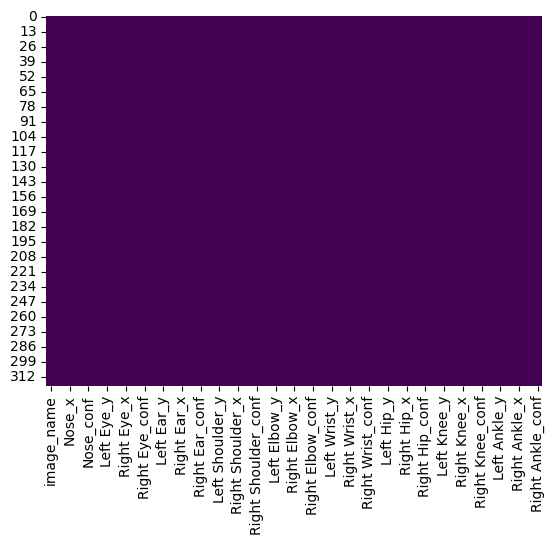

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Load the dataset
csv_path = "/content/keypoints_train.csv"
data = pd.read_csv(csv_path)

# Step 1: Remove the 'image_name' column
data = data.drop(columns=["image_name"])

# Step 2: Separate x and y columns
coordinate_columns = [col for col in data.columns if "_x" in col or "_y" in col]

# Prepare the feature set (X) as all coordinates flattened
X = data[coordinate_columns]

y = data["classid"]
#y = [1 if val == 1 else 0 for val in y]
y = [1 if val in (0, 1, 2) else 0 for val in y]


# Step 5: Normalize the features using Min-Max Scaling
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
scaler_min = scaler.min_
scaler_scale = scaler.scale_

print("Scaler Min:", scaler_min)
print("Scaler Scale:", scaler_scale)
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42, stratify=y
)



Scaler Min: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Scaler Scale: [0.00311898 0.00437944 0.00232683 0.00448948 0.00217362 0.00334368
 0.00242497 0.00252851 0.00177072 0.0017331  0.00185284 0.00204068
 0.00206991 0.00214229 0.00289022 0.00201712 0.0026108  0.00166088]


In [ ]:
scaler_scale

array([0.00311898, 0.00437944, 0.00232683, 0.00448948, 0.00217362,
       0.00334368, 0.00242497, 0.00252851, 0.00177072, 0.0017331 ,
       0.00185284, 0.00204068, 0.00206991, 0.00214229, 0.00289022,
       0.00201712, 0.0026108 , 0.00166088])

In [ ]:
# Step 7: Train an SVM classifier
svm_model = SVC(kernel="linear",probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = svm_model.predict(X_test)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.29      0.42       154
           1       0.86      0.98      0.92       664

    accuracy                           0.85       818
   macro avg       0.83      0.63      0.67       818
weighted avg       0.85      0.85      0.82       818



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.67      0.77       154
           1       0.93      0.98      0.95       664

    accuracy                           0.92       818
   macro avg       0.91      0.83      0.86       818
weighted avg       0.92      0.92      0.92       818



In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.40      0.53       154
           1       0.88      0.98      0.92       664

    accuracy                           0.87       818
   macro avg       0.84      0.69      0.73       818
weighted avg       0.86      0.87      0.85       818



5.0

In [ ]:
from joblib import dump

# Save different models
dump(svm_model, '/content/drive/MyDrive/Activity_classification/two_classes_ondisk_not_svm_modelv2.joblib')  # SVM
dump(rf_model, '/content/drive/MyDrive/Activity_classification/two_classes_ondisk_not_random_forest_modelv2.joblib')  # Random Forest
dump(lr_model, '/content/drive/MyDrive/Activity_classification/two_classes_ondisk_not_logistic_regression_modelv2.joblib')  # Logistic Regression

print("Models saved successfully.")


Models saved successfully.


In [ ]:
from joblib import load


svm_model1 = load('svm_model.joblib')


rf_model1 = load('random_forest_model.joblib')


lr_model1 = load('logistic_regression_model.joblib')

svm_predictions = svm_model1.predict(X_test)
rf_predictions = rf_model1.predict(X_test)
lr_predictions = lr_model1.predict(X_test)

print("Predictions made with loaded models.")


Predictions made with loaded models.


In [ ]:
def divide_keypoints_without_confidence(keypoints):
    """
    Divide keypoints into left-side and right-side lists, including Nose in both.
    Confidence values are removed.

    Args:
        keypoints (list): A list of keypoints in the format [x, y, confidence].

    Returns:
        left_side (list): Keypoints for the left side, including the Nose (x, y only).
        right_side (list): Keypoints for the right side, including the Nose (x, y only).
    """
    # Define indices for left-side and right-side keypoints
    left_side=[]
    right_side=[]
    left_indices = [0, 1, 3, 5, 7, 9, 11, 13, 15]  # Nose + left keypoints
    right_indices = [0, 2, 4, 6, 8, 10, 12, 14, 16]  # Nose + right keypoints
    for i in left_indices:
      left_side.append(keypoints[i][0])
      left_side.append(keypoints[i][1])
    for i in right_indices:
      right_side.append(keypoints[i][0])
      right_side.append(keypoints[i][1])
    # Separate keypoints into left-side and right-side lists, removing confidence values

    return left_side, right_side


In [ ]:
import csv

# Path to the output CSV file
output_csv = "predictions.csv"

# Write the header (only once, at the start)
header = ["SVM Predictions",'svm_predictions_right', "RF Predictions","rf_predictions_right", "LR Predictions","lr_predictions_right", "Actual Class"]
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)

In [ ]:
from logging import exception
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import cv2
import os
import numpy as np
images_paths='/content/Employee-Performance-Monitoring-4/valid/images/'
images_list=os.listdir(images_paths)
label_paths='/content/Employee-Performance-Monitoring-4/valid/labels/'
model = YOLO("yolo11x-pose.pt")

image_name=images_list[0]
for image_name in images_list:
  label_name=image_name.replace('.jpg','.txt')
  label_path=f'{label_paths}{label_name}'
  image_path=images_paths+image_name
  boxes=read_boxes_from_file(label_path)
  images,classes=crop_boxes_from_image(image_path,boxes)
  for image,clase in zip(images,classes):
    results=model(image, verbose=False)
    keypoints=results[0].keypoints.data.tolist()[0]
    if len(results[0].keypoints.data.tolist()[0])>0:
      try:
          left,right=divide_keypoints_without_confidence(keypoints)
          features = np.array(left)
          features_reshaped = features.reshape(1, -1)
          scaler = MinMaxScaler()
          scaler.min_ = np.array([0.0, 0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])  # Min values used during training
          scaler.scale_ = np.array([0.0019971, 0.0031742,0.002015,0.0039941,0.0023502,0.0042651,0.001957 ,0.0030745,0.0018208,0.0021622,0.0018549 ,0.0024703,0.002113,   0.0019829,0.0020896, 0.002043,0.0021387,0.001648])
          normalized_features = scaler.transform(features_reshaped)
          svm_predictions = svm_model1.predict(normalized_features)
          rf_predictions = rf_model1.predict(normalized_features)
          lr_predictions = lr_model1.predict(normalized_features)
          # with open(output_csv, mode='a', newline='') as file:
          #     writer = csv.writer(file)
          #     writer.writerow([svm_predictions[0], rf_predictions[0], lr_predictions[0], clase])

          features = np.array(right)
          features_reshaped = features.reshape(1, -1)
          scaler = MinMaxScaler()
          scaler.min_ = np.array([0.0, 0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])  # Min values used during training
          scaler.scale_ = np.array([0.0019971, 0.0031742,0.002015,0.0039941,0.0023502,0.0042651,0.001957 ,0.0030745,0.0018208,0.0021622,0.0018549 ,0.0024703,0.002113,   0.0019829,0.0020896, 0.002043,0.0021387,0.001648])
          normalized_features = scaler.transform(features_reshaped)
          svm_predictions_right = svm_model1.predict(normalized_features)
          rf_predictions_right = rf_model1.predict(normalized_features)
          lr_predictions_right = lr_model1.predict(normalized_features)
          with open(output_csv, mode='a', newline='') as file:
              writer = csv.writer(file)
              writer.writerow([svm_predictions[0],svm_predictions_right[0], rf_predictions[0],rf_predictions_right[0], lr_predictions[0],lr_predictions_right[0], clase])
      except :
          print(keypoints)
        # print(svm_predictions)
        # print(rf_predictions)
        # print(lr_predictions)
        # print(clase)

        # print(keypoints)
        # break
        # for keypoint in results[0].keypoints.data.tolist()[0]:
        #         x, y, confidence = keypoint
        #         if confidence >= 0.0:
        #           cv2.circle(image, (int(x), int(y)), 5, (0, 255, 0), -1)
        # cv2_imshow(image)



[[24.18349838256836, 30.472043991088867, 0.651991069316864], [24.167146682739258, 26.34638786315918, 0.7929235100746155], [0.0, 0.0, 0.06738701462745667], [31.161884307861328, 25.41508674621582, 0.9354494214057922], [0.0, 0.0, 0.03264755383133888], [37.64106750488281, 46.50209045410156, 0.899717390537262], [46.14816665649414, 42.09397888183594, 0.6643808484077454], [23.096303939819336, 62.79975891113281, 0.5763241052627563], [0.0, 0.0, 0.2201656699180603], [0.0, 0.0, 0.4657715857028961], [0.0, 0.0, 0.24508315324783325], [0.0, 0.0, 0.24361203610897064], [0.0, 0.0, 0.1910291463136673], [0.0, 0.0, 0.09017717093229294], [0.0, 0.0, 0.07099610567092896], [0.0, 0.0, 0.022375041618943214], [0.0, 0.0, 0.02160697616636753]]
[[0.0, 0.0, 0.36292627453804016], [0.0, 0.0, 0.043912291526794434], [0.0, 0.0, 0.26389503479003906], [0.0, 0.0, 0.04666253179311752], [24.38286781311035, 37.82331848144531, 0.5776488184928894], [18.07421875, 65.22944641113281, 0.8453348875045776], [16.734609603881836, 65.2563

In [ ]:
import pandas as pd
df = pd.read_csv('/content/keypoints_train.csv')
for column in df.columns:
    num_zeros = (df[column] == 0.0).sum()
    print(f"{column}: {num_zeros} zeros")

image_name: 0 zeros
classid: 177 zeros
Nose_x: 2205 zeros
Nose_y: 2205 zeros
Eye_x: 2248 zeros
Eye_y: 2248 zeros
Ear_x: 1437 zeros
Ear_y: 1437 zeros
Shoulder_x: 545 zeros
Shoulder_y: 545 zeros
Elbow_x: 909 zeros
Elbow_y: 908 zeros
Wrist_x: 1522 zeros
Wrist_y: 1523 zeros
Hip_x: 1287 zeros
Hip_y: 1287 zeros
Knee_x: 3017 zeros
Knee_y: 3017 zeros
Ankle_x: 3729 zeros
Ankle_y: 3729 zeros
